In [308]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [273]:
df=pd.read_csv('Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [275]:
object_columns = df.select_dtypes(include=['object']).columns

for column in object_columns:
    print(f"Column: {column}")
    print(df[column].unique())
    print()

Column: Booking_ID
['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']

Column: type_of_meal_plan
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']

Column: room_type_reserved
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']

Column: market_segment_type
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']

Column: booking_status
['Not_Canceled' 'Canceled']



In [276]:
df1 = df['type_of_meal_plan']
df1.head(5)

0     Meal Plan 1
1    Not Selected
2     Meal Plan 1
3     Meal Plan 1
4    Not Selected
Name: type_of_meal_plan, dtype: object

In [277]:
df2 = df['room_type_reserved']
df2.head(5)

0    Room_Type 1
1    Room_Type 1
2    Room_Type 1
3    Room_Type 1
4    Room_Type 1
Name: room_type_reserved, dtype: object

In [278]:
df3 = df['market_segment_type']
df3.head(5)

0    Offline
1     Online
2     Online
3     Online
4     Online
Name: market_segment_type, dtype: object

In [279]:
df4 = df['booking_status']
df4.head(5)

0    Not_Canceled
1    Not_Canceled
2        Canceled
3        Canceled
4        Canceled
Name: booking_status, dtype: object

In [280]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Text(50.722222222222214, 0.5, 'Values in dataset')

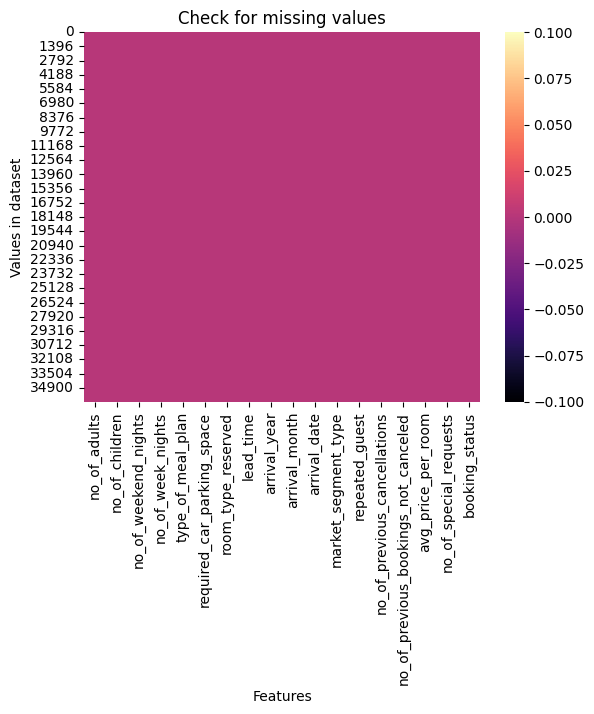

In [309]:
sns.heatmap(df.isnull(), cmap = 'magma')
plt.gca().set_title('Check for missing values')
plt.xlabel('Features')
plt.ylabel('Values in dataset')

In [281]:
duplicated_rows=df[df.duplicated()]
print(f'No of Duplicated Rows Present in the dataset: {duplicated_rows.shape[0]}')

No of Duplicated Rows Present in the dataset: 0


Text(0, 0.5, 'Counting values')

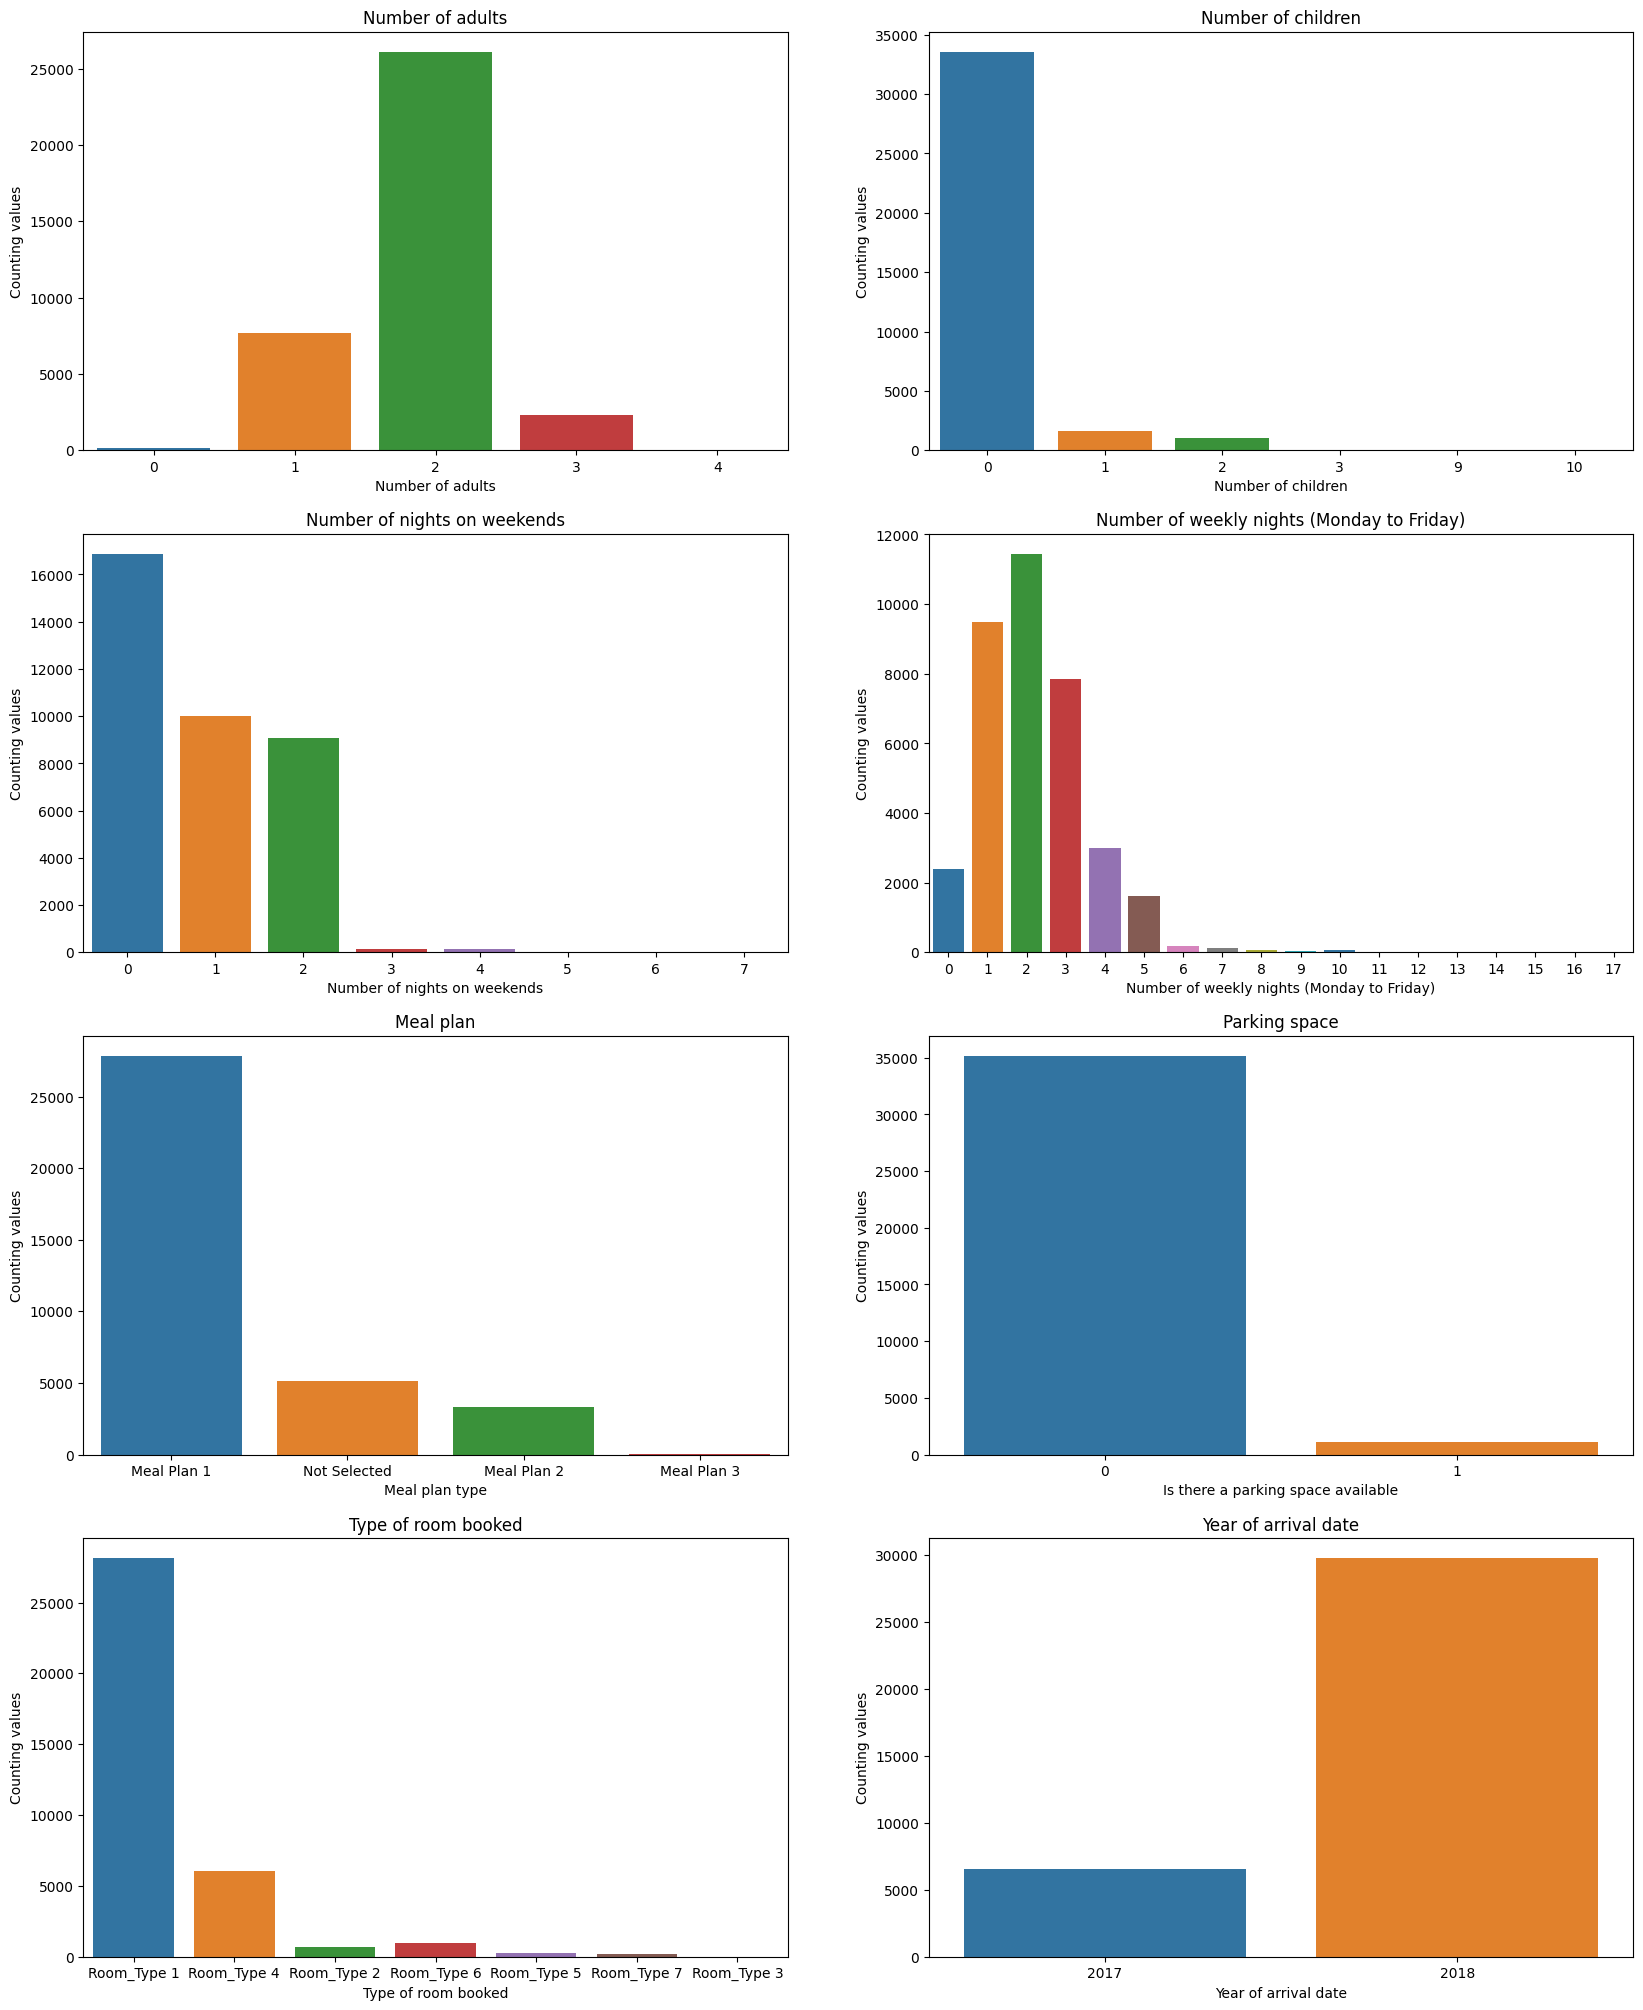

In [282]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Number of adults')
sns.countplot(x = 'no_of_adults', palette = 'tab10', data = df)
plt.xlabel('Number of adults')
plt.ylabel('Counting values')

plt.subplot(4,2,2)
plt.gca().set_title('Number of children')
sns.countplot(x = 'no_of_children', palette = 'tab10', data = df)
plt.xlabel('Number of children')
plt.ylabel('Counting values')

plt.subplot(4,2,3)
plt.gca().set_title('Number of nights on weekends')
sns.countplot(x = 'no_of_weekend_nights', palette = 'tab10', data = df)
plt.xlabel('Number of nights on weekends')
plt.ylabel('Counting values')

plt.subplot(4,2,4)
plt.gca().set_title('Number of weekly nights (Monday to Friday)')
sns.countplot(x = 'no_of_week_nights', palette = 'tab10', data = df)
plt.xlabel('Number of weekly nights (Monday to Friday)')
plt.ylabel('Counting values')

plt.subplot(4,2,5)
plt.gca().set_title('Meal plan')
sns.countplot(x = 'type_of_meal_plan', palette = 'tab10', data = df)
plt.xlabel('Meal plan type')
plt.ylabel('Counting values')

plt.subplot(4,2,6)
plt.gca().set_title('Parking space')
sns.countplot(x = 'required_car_parking_space', palette = 'tab10', data = df)
plt.xlabel('Is there a parking space available')
plt.ylabel('Counting values')

plt.subplot(4,2,7)
plt.gca().set_title('Type of room booked')
sns.countplot(x = 'room_type_reserved', palette = 'tab10', data = df)
plt.xlabel('Type of room booked')
plt.ylabel('Counting values')

plt.subplot(4,2,8)
plt.gca().set_title('Year of arrival date')
sns.countplot(x = 'arrival_year', palette = 'tab10', data = df)
plt.xlabel('Year of arrival date')
plt.ylabel('Counting values')

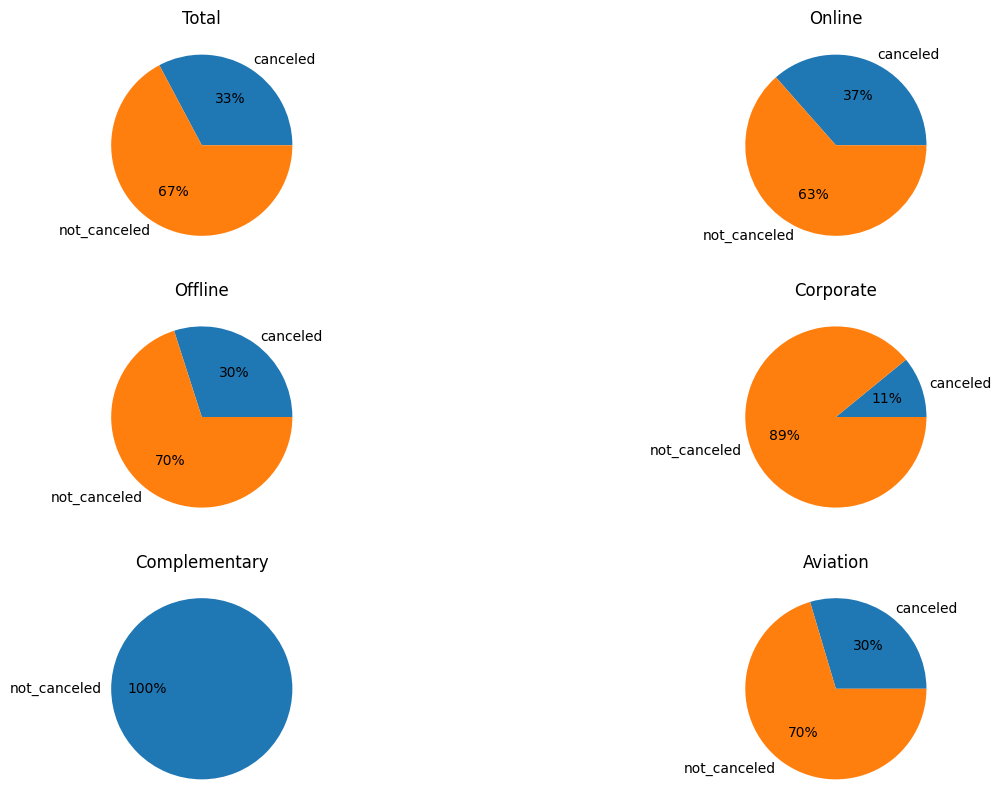

In [283]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax6 = fig.add_subplot(3, 2, 6)

ax1.set_title("Total")
ax2.set_title("Online")
ax3.set_title("Offline")
ax4.set_title("Corporate")
ax5.set_title("Complementary")
ax6.set_title("Aviation")

ax1.pie(df.groupby('booking_status')['Booking_ID'].count(),autopct='%.0f%%',labels=['canceled','not_canceled'])
ax2.pie(df[df['market_segment_type']=='Online'].groupby('booking_status')['Booking_ID'].count(),autopct='%.0f%%',labels=['canceled','not_canceled'])
ax3.pie(df[df['market_segment_type']=='Offline'].groupby('booking_status')['Booking_ID'].count(),autopct='%.0f%%',labels=['canceled','not_canceled'])
ax4.pie(df[df['market_segment_type']=='Corporate'].groupby('booking_status')['Booking_ID'].count(),autopct='%.0f%%',labels=['canceled','not_canceled'])
ax5.pie(df[df['market_segment_type']=='Complementary'].groupby('booking_status')['Booking_ID'].count(),autopct='%.0f%%',labels=['not_canceled'])
ax6.pie(df[df['market_segment_type']=='Aviation'].groupby('booking_status')['Booking_ID'].count(),autopct='%.0f%%',labels=['canceled','not_canceled']);

In [284]:
num_feature=[feature for feature in df.columns if df[feature].dtype!='O']
print(num_feature)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [285]:
num_feature=['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space',
             'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 
             'avg_price_per_room', 'no_of_special_requests']
date_feature=['arrival_year', 'arrival_month', 'arrival_date']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


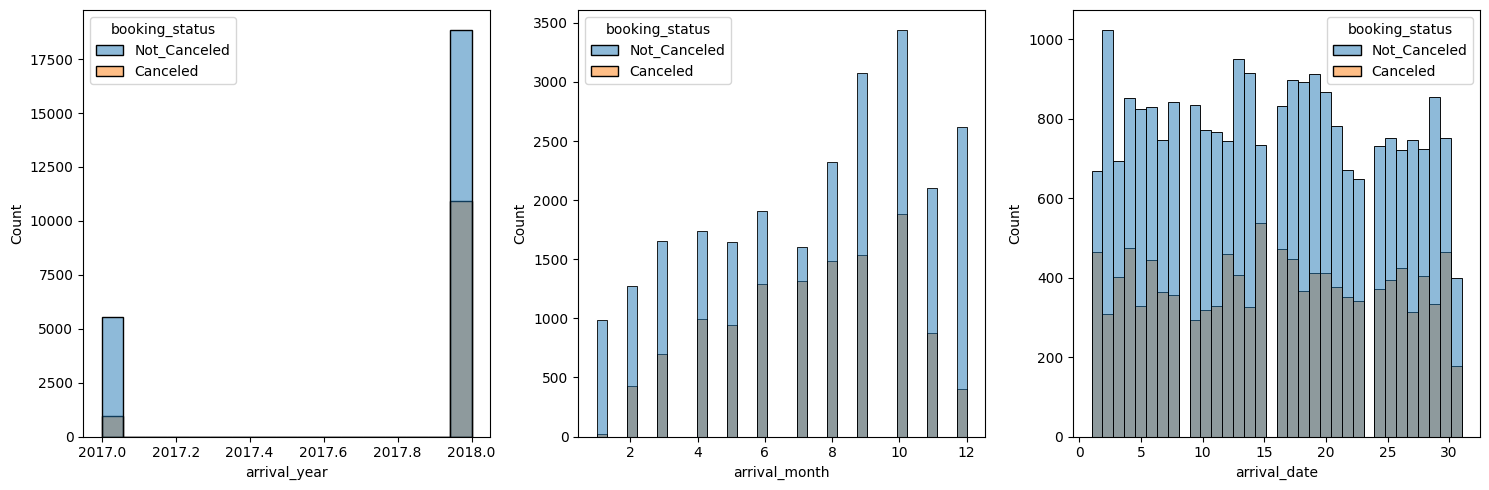

In [286]:
fig = plt.figure(figsize=(15,5))

for i in range(len(date_feature)):
    plt.subplot(1,3,i+1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
    sns.histplot(data=df,x=df[date_feature[i]],hue=df['booking_status'])


plt.tight_layout()
plt.show()

In [287]:
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [288]:
df['type_of_meal_plan'] = df['type_of_meal_plan'].map({'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3})

In [289]:
df1 = df['type_of_meal_plan']
df1.head(5)

0    1
1    0
2    1
3    1
4    0
Name: type_of_meal_plan, dtype: int64

In [290]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [291]:
df['room_type_reserved'] = df['room_type_reserved'].map({'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7})

In [292]:
df2 = df['room_type_reserved']
df2.head(5)

0    1
1    1
2    1
3    1
4    1
Name: room_type_reserved, dtype: int64

In [293]:
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [294]:
df['market_segment_type'] = df['market_segment_type'].map({'Offline': 0,'Online': 1,'Corporate': 2,'Aviation': 3,'Complementary': 4,})

In [295]:
df3 = df['market_segment_type']
df3.head(5)

0    0
1    1
2    1
3    1
4    1
Name: market_segment_type, dtype: int64

In [296]:
df['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [297]:
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled':1})

In [298]:
df4 = df['booking_status']
df4.head(5)

0    0
1    0
2    1
3    1
4    1
Name: booking_status, dtype: int64

In [299]:
df = df.drop('Booking_ID', axis=1)

In [300]:
df.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,0,65.00,0,0
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,0
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,1
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,1
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,1


Text(0, 0.5, 'Days between booking and arrival')

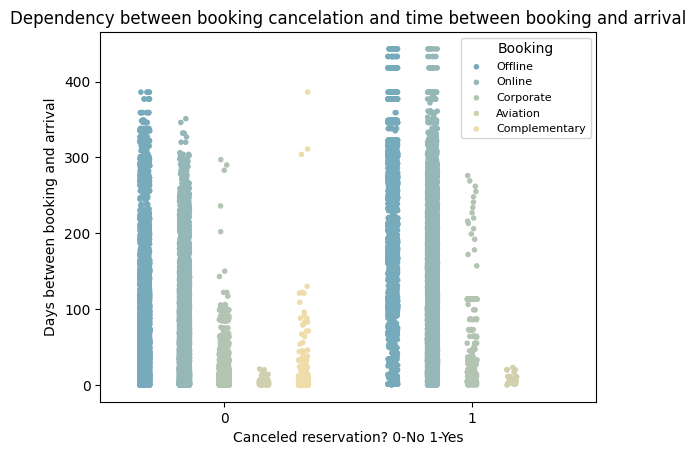

In [301]:
stp = sns.stripplot(data=df, x="booking_status", y="lead_time", hue="market_segment_type", jitter = True, dodge = True, palette = 'blend:#7AB,#EDA', size = 4)
plt.gca().set_title('Dependency between booking cancelation and time between booking and arrival')
labels_dict = {0:'Offline', 1:'Online', 2:'Corporate', 3:'Aviation', 4:'Complementary'}
plt.legend(loc='upper right', title='Booking',labels=labels_dict.values(), prop={'size': 8})
stp.set_xlabel('Canceled reservation? 0-No 1-Yes')
stp.set_ylabel('Days between booking and arrival')

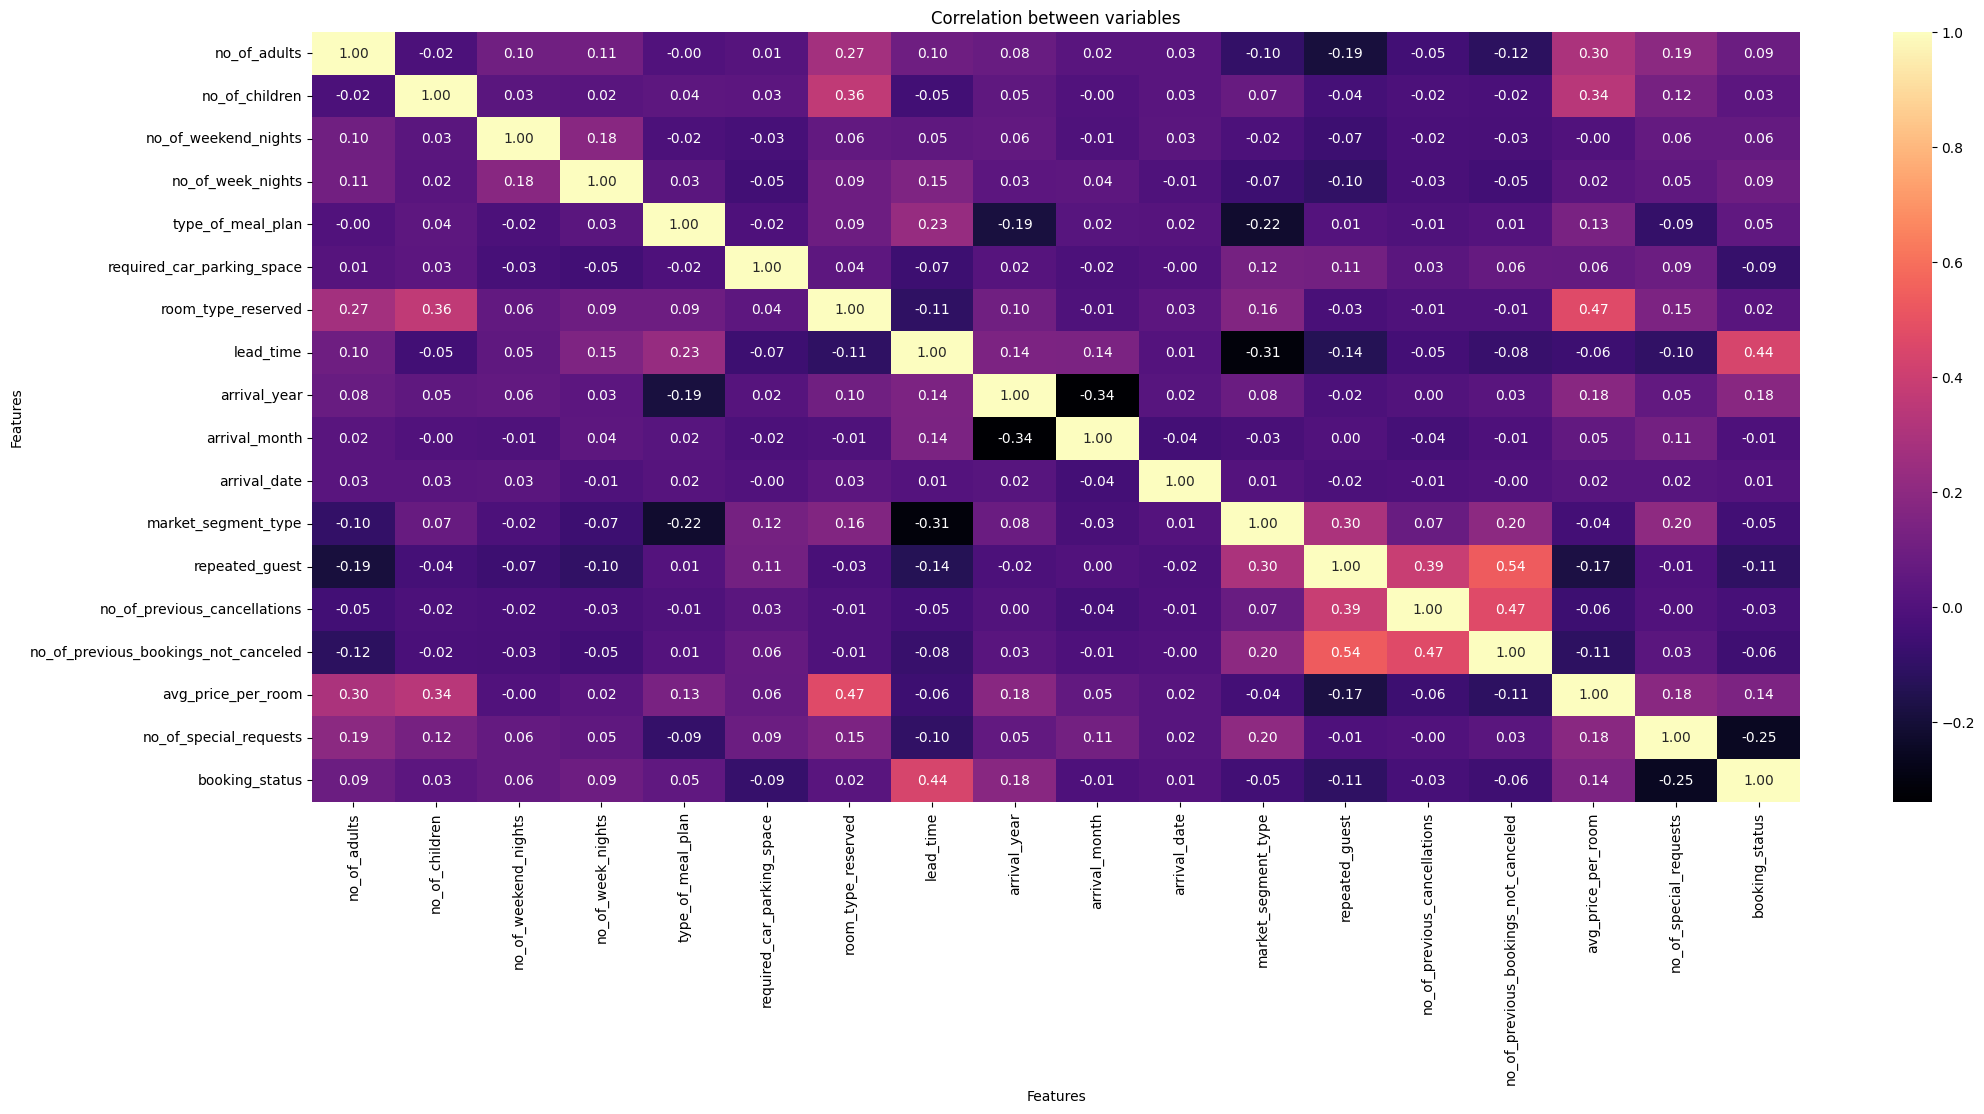

In [302]:
fig, ax = plt.subplots(figsize=(24, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'magma',fmt='.2f')
plt.gca().set_title('Correlation between variables')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [303]:
df = pd.get_dummies(df, drop_first=True)

In [304]:
df['no_of_adults'] = np.log(df['no_of_adults'] + 1)
df['no_of_children'] = np.log(df['no_of_children'] + 1)
df['no_of_weekend_nights'] = np.log(df['no_of_weekend_nights'] + 1)
df['no_of_week_nights'] = np.log(df['no_of_week_nights'] + 1)
df['required_car_parking_space'] = np.log(df['required_car_parking_space'] + 1)
df['lead_time'] = np.log(df['lead_time'] + 1)
df['repeated_guest'] = np.log(df['repeated_guest'] + 1)
df['no_of_previous_cancellations'] = np.log(df['no_of_previous_cancellations'] + 1)
df['no_of_previous_bookings_not_canceled'] = np.log(df['no_of_previous_bookings_not_canceled'] + 1)
df['avg_price_per_room'] = np.log(df['avg_price_per_room'] + 1)
df['no_of_special_requests'] = np.log(df['no_of_special_requests'] + 1)

In [305]:
y = df["booking_status"]
X = df.drop("booking_status", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [306]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7868234861710925
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      7332
           1       0.71      0.59      0.64      3551

    accuracy                           0.79     10883
   macro avg       0.76      0.74      0.75     10883
weighted avg       0.78      0.79      0.78     10883



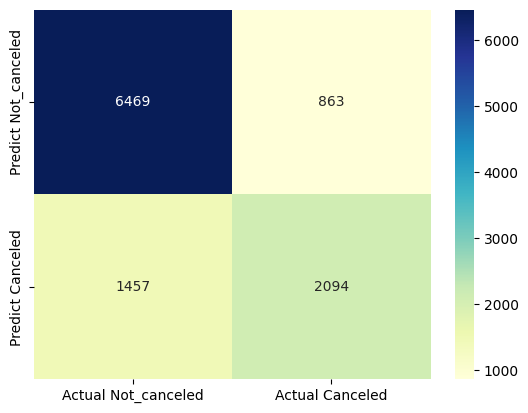

In [307]:
cm_matrix = pd.DataFrame(data=conf, columns=['Actual Not_canceled', 'Actual Canceled'], 
                                 index=['Predict Not_canceled', 'Predict Canceled'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu');